# Front Matter: CASA0013: Foundations of Spatial Data Science

## Title of Briefing

### Student ID

### Word Count:

# Reproducible Analysis

## Classification of Airbnb penetration in London 

This notebook holds the analysis for the classification of Airbnb penetration in London. 
After a first exploration of the datasets with visualisations that seek to quantify the current picture of Airbnb listings in London, the London wards are classified by their amaount of listings (low, medium, large), followed by a geodemographic classification of the neighboorhods that attempts to identify patterns expaining and perhaps predicting the presence or absense of listings. 

Data used for this analysis were obtained from the following sources:
* Airbnb listings, compiled 10 October 2021: <http://insideairbnb.com/get-the-data.html>
* London Wards data: <https://data.london.gov.uk/dataset/ward-profiles-and-atlas>
* London Wards geography: <https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london>

For ease of access the data has been saved in the following github repository: <https://github.com/DaphneBdn/fsds_cw3>

### Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

Airbnb Data

In [2]:
# Load in the Airbnb data 
df = pd.read_csv('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/raw/listings.csv.gz?raw=true', compression='gzip')
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211010233627,2021-10-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,20211010233627,2021-10-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.79
2,17402,https://www.airbnb.com/rooms/17402,20211010233627,2021-10-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,2,2,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20211010233627,2021-10-12,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,24328,https://www.airbnb.com/rooms/24328,20211010233627,2021-10-12,"Battersea bedroom & studio, parking, shared ga...","Artist house, bright high ceiling rooms, priva...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/c4ffa398-ebfd...,41759,https://www.airbnb.com/users/show/41759,...,4.93,4.58,4.64,NaN,f,1,1,0,0,0.77


In [3]:
# extract the column names
cols=df.columns
print(cols)
print(f"The Inside Airbnb dataset has {len(cols)} columns")

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### Investigate NA values

In [4]:
# change settings to display all rows
pd.set_option('display.max_rows', None)
# print out the count of NA values per column
df.isna().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    67903
calendar_updated                                67903
license                                         67903
bathrooms                                       67903
host_response_rate                              34288
host_response_time                              34288
host_acceptance_rate                            33907
host_about                                      30360
neighborhood_overview                           26939
neighbourhood                                   26938
review_scores_value                             20472
review_scores_location                          20468
review_scores_checkin                           20467
review_scores_communication                     20430
review_scores_accuracy                          20427
review_scores_cleanliness                       20415
first_review                                    19028
reviews_per_month                               19028
last_review                 

Note: There seem to be no NA values in the longitude and latitude column

In [5]:
# change settings back 
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [6]:
sub_cols=['id', 'name',
       'latitude','longitude', 'property_type', 'room_type', 'price',
       'availability_365', 'number_of_reviews_l30d', 'first_review',
       'last_review']

In [18]:
df= df[sub_cols]
df.set_index('id', inplace=True)
df.head()


KeyError: "['id'] not in index"

Convert the dataframe(df) into a geodataframe using the epsg code for the World Geodetic System 1984, then convert to British National Grid 

In [8]:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.longitude, df.latitude, 
                       crs= 'epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

<AxesSubplot:>

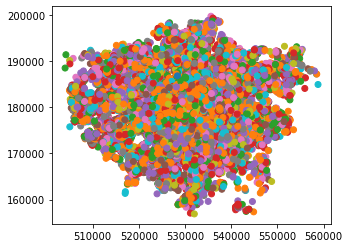

In [9]:
#check the geodataframe with a quick plot
gdf.plot(column="price")

### London Boundary 

create the boundary of London for maps

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

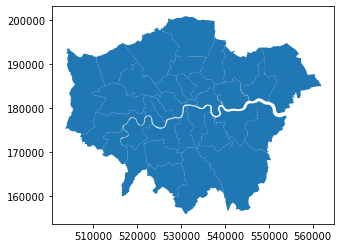

In [10]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros.plot()

In [13]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})


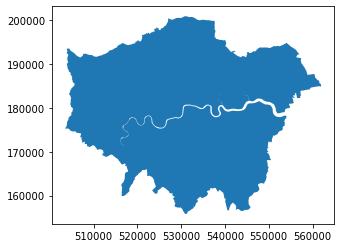

In [14]:
ldn['geometry'] = ldn.original.buffer(20)
ldn = ldn.set_geometry('geometry')
ldn.plot();

Airbnb point map

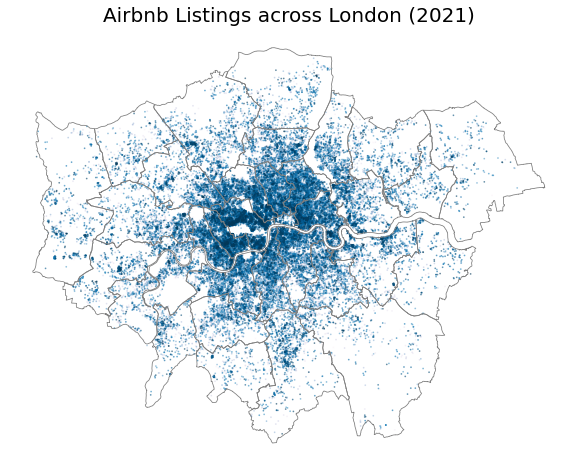

<Figure size 432x288 with 0 Axes>

In [15]:
#create a base axis for the plot
fig, ax = plt.subplots(1,1, figsize = (12,8))

#plot the London outline 
boros.boundary.plot(ax=ax, edgecolor = "grey", linewidth=0.8)

#plot the airbnb listings
gdf.plot(ax = ax, cmap='PuBu', markersize = 0.6, alpha = 0.5)

#set the axis off
ax.set_axis_off()

#add title
ax.set_title("Airbnb Listings across London (2021)", fontsize = 20)

plt.show()

#plt.savefig("Airbnb_map_dots.png", bbox_inches = 'tight')

In [ ]:
# add comparison with a previous year
# add comparison with actieve listings
# add density per Borough or msoa?

In order to filter out the active listings , this analysis will consider the review as indicator. 
Any review in the past year from the date the data was compiled (2021-10-10) will deem the listing active

In [19]:
gdf.sample(4, random_state=42)

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry
id,,,,,,,,,,,
42409608,Cosy two bedroom home full of character,51.43951,-0.19965,Entire rental unit,Entire home/apt,$100.00,0,0,NaN,NaN,POINT (525228.295 172705.369)
39318693,Frills-free yet Clean and Comfortable Bedroom,51.51699,-0.06882,Private room in condominium (condo),Private room,$17.00,0,0,2019-10-25,2019-10-27,POINT (534093.520 181552.877)
29555250,Unmissable Luxurious Mews House in Central London,51.49980,-0.14976,Entire residential home,Entire home/apt,$625.00,200,0,2019-01-11,2018-12-19,POINT (528526.190 179496.193)
19248360,Wonderful Private room+tea/coffee&sweets,51.53640,0.01036,Private room in rental unit,Private room,$25.00,0,0,2017-06-25,2018-10-11,POINT (539527.700 183859.253)
13104327,Spacious 2 bed apartment in Little Venice,51.52365,-0.18992,Entire rental unit,Entire home/apt,$536.00,1,0,NaN,NaN,POINT (525673.203 182078.724)
23710037,Modern and airy 1BR apartment close to Hyde Park,51.49487,-0.20187,Entire rental unit,Entire home/apt,$210.00,32,0,NaN,NaN,POINT (524922.848 178857.820)
48794672,Light and airy top floor private studio space.,51.56315,-0.40357,Private room in loft,Private room,$38.00,73,0,2021-05-31,2021-08-14,POINT (510756.035 186126.452)
29232304,2 Bed Luxury apartment in Olympic park Stratford,51.54308,-0.00984,Entire condominium (condo),Entire home/apt,$136.00,0,0,2019-01-06,2019-01-06,POINT (538106.622 184563.780)
7608720,Modern and stylish one bedroom flat,51.51410,-0.10200,Entire rental unit,Entire home/apt,$100.00,0,0,2016-04-17,2016-04-22,POINT (531799.818 181171.270)


In [22]:
print(f"gdf now contains {gdf.shape[0]} rows.")

gdf now contains 67903 rows.


In [24]:
# first drop the NaN values fro the "last review" column
gdf.drop(gdf[gdf.last_review.isna()].index.values, axis=0, inplace=True)


gdf now contains 48875 rows.


In [26]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48875 entries, 13913 to 52669884
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   name                    48867 non-null  object  
 1   latitude                48875 non-null  float64 
 2   longitude               48875 non-null  float64 
 3   property_type           48875 non-null  object  
 4   room_type               48875 non-null  object  
 5   price                   48875 non-null  object  
 6   availability_365        48875 non-null  int64   
 7   number_of_reviews_l30d  48875 non-null  int64   
 8   first_review            48875 non-null  object  
 9   last_review             48875 non-null  object  
 10  geometry                48875 non-null  geometry
dtypes: float64(2), geometry(1), int64(2), object(6)
memory usage: 4.5+ MB


In [30]:
gdf["last_review "]= pd.to_datetime(gdf["last_review"], format='%Y-%m-%d')

In [32]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48875 entries, 13913 to 52669884
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    48867 non-null  object        
 1   latitude                48875 non-null  float64       
 2   longitude               48875 non-null  float64       
 3   property_type           48875 non-null  object        
 4   room_type               48875 non-null  object        
 5   price                   48875 non-null  object        
 6   availability_365        48875 non-null  int64         
 7   number_of_reviews_l30d  48875 non-null  int64         
 8   first_review            48875 non-null  object        
 9   last_review             48875 non-null  object        
 10  geometry                48875 non-null  geometry      
 11  last_review             48875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2

In [34]:
# Filter for active listings
active_gdf = gdf.loc[gdf["last_review"] >= '2020-10-10']

# Display
active_gdf.sample(4, random_state=42)

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry,last_review
id,,,,,,,,,,,,
7019406,Spacious Classy Portobello Apartment,51.52359,-0.20824,Entire rental unit,Entire home/apt,$170.00,365,0,2018-08-06,2021-06-29,POINT (524402.487 182040.773),2021-06-29
51033334,Superb 1 Bed Flat - Brick Lane (Free Parking),51.52397,-0.06481,Entire condominium (condo),Entire home/apt,$110.00,0,1,2021-07-26,2021-10-04,POINT (534351.206 182336.422),2021-10-04
47173303,Beautiful room in Little Venice,51.52274,-0.19467,Private room in condominium (condo),Private room,$40.00,11,0,2020-12-27,2021-05-25,POINT (525346.187 181969.387),2021-05-25
26120791,Clean and Spacious Balcony Room - 15m to Hyde ...,51.53076,-0.18641,Private room in rental unit,Private room,$50.00,115,0,2018-07-16,2021-07-24,POINT (525897.098 182875.417),2021-07-24


In [36]:
print(f"active_gdf contains {active_gdf.shape[0]} rows.")

active_gdf contains 13577 rows.


### Comparison map 

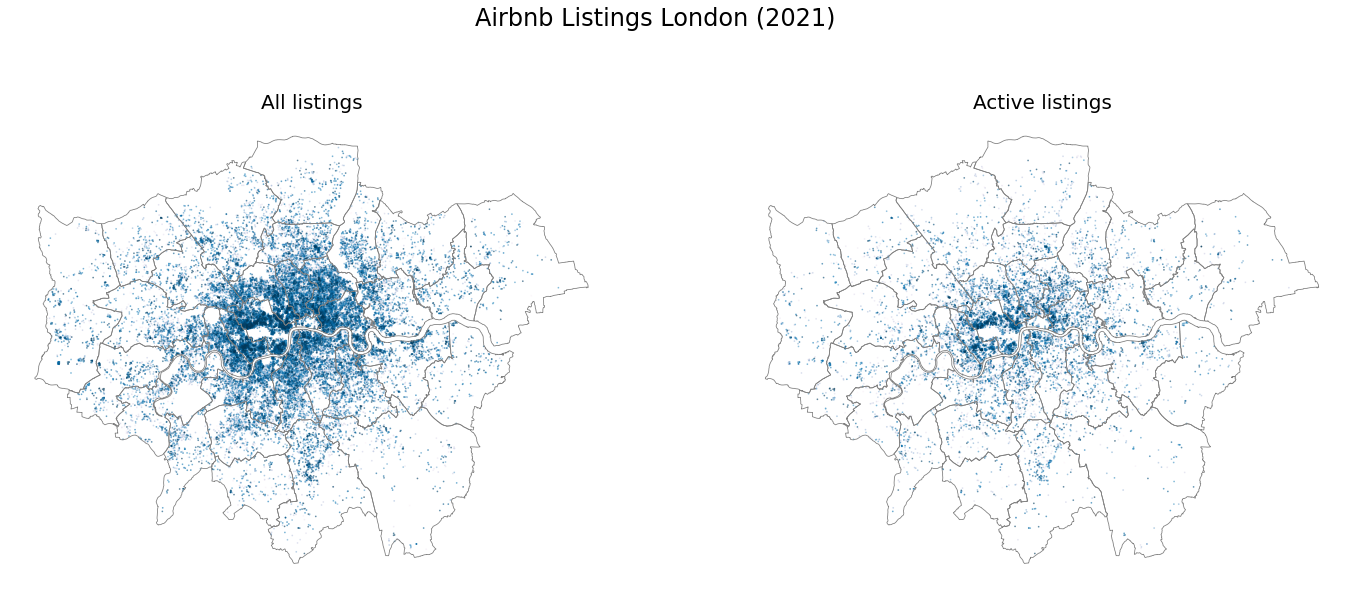

In [57]:
#create a base axis for the plot
fig, axes = plt.subplots(1,2, figsize = (24,16))

plt1 = 'All listings'
plt2 = 'Active listings'

#plot the London outline 
boros.boundary.plot(ax=axes[0], edgecolor = "grey", linewidth=0.8)
#plot the airbnb listings
gdf.plot(ax = axes[0], cmap='PuBu', markersize = 0.6, alpha = 0.5)

#plot the London outline 
boros.boundary.plot(ax=axes[1], edgecolor = "grey", linewidth=0.8)
#plot the active airbnb listings
active_gdf.plot(ax = axes[1], cmap='PuBu', markersize = 0.6, alpha = 0.5)


#set the axis off
for ax in axes:
    ax.axis('off')

#add title

fig.suptitle('Airbnb Listings London (2021)', y=0.8,ha='center', size=24)
axes[0].set_title(plt1.capitalize(), size=20)
axes[1].set_title(plt2.capitalize(), size=20)

#plt.show()

plt.savefig("Active_Airbnb_map_comparison_dots.png", bbox_inches = 'tight')